In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:
file_path = 'customer_credit.csv'
data = pd.read_csv(file_path)

In [7]:
print("Primeras filas del dataset:")
print(data.head())

Primeras filas del dataset:
   CustomerID  CreditScore        Income    LoanAmount  Default
0        9961   451.435013  40833.374436  26411.146513        1
1        9662   652.036858  62920.001249  44678.903351        0
2        4623   360.567098  90228.633694  47406.864393        0
3        6123   671.236755  96930.311656  39907.317658        0
4        7730   424.618751  42190.837856  23198.980666        0


In [8]:
print("\nInformación general del dataset:")
print(data.info())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   2000 non-null   int64  
 1   CreditScore  2000 non-null   float64
 2   Income       2000 non-null   float64
 3   LoanAmount   2000 non-null   float64
 4   Default      2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB
None


In [9]:
data_cleaned = data.dropna()

In [10]:
print("\nDatos después de eliminar valores faltantes:")
print(data_cleaned.info())


Datos después de eliminar valores faltantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   2000 non-null   int64  
 1   CreditScore  2000 non-null   float64
 2   Income       2000 non-null   float64
 3   LoanAmount   2000 non-null   float64
 4   Default      2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB
None


In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned.select_dtypes(include=[np.number]))
print("\nPrimeras filas de los datos normalizados:")
print(data_scaled[:5])


Primeras filas de los datos normalizados:
[[ 1.68621015 -0.76580966 -1.01883769 -0.09962658  0.97628121]
 [ 1.57191678  0.47743932 -0.25891276  1.32766424 -1.02429504]
 [-0.35425133 -1.3289722   0.68068345  1.54080447 -1.02429504]
 [ 0.21912676  0.59643251  0.91126516  0.95485216 -1.02429504]
 [ 0.83340581 -0.932006   -0.97213204 -0.35059855 -1.02429504]]


In [14]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

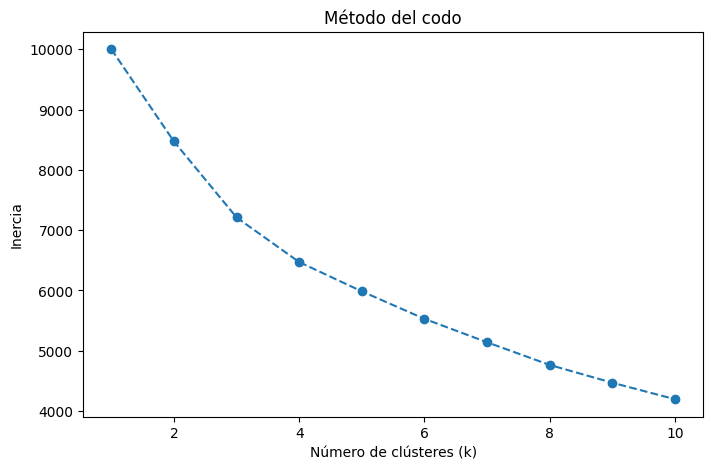

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Método del codo')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.show()

In [16]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

In [17]:
data_cleaned['Cluster'] = clusters

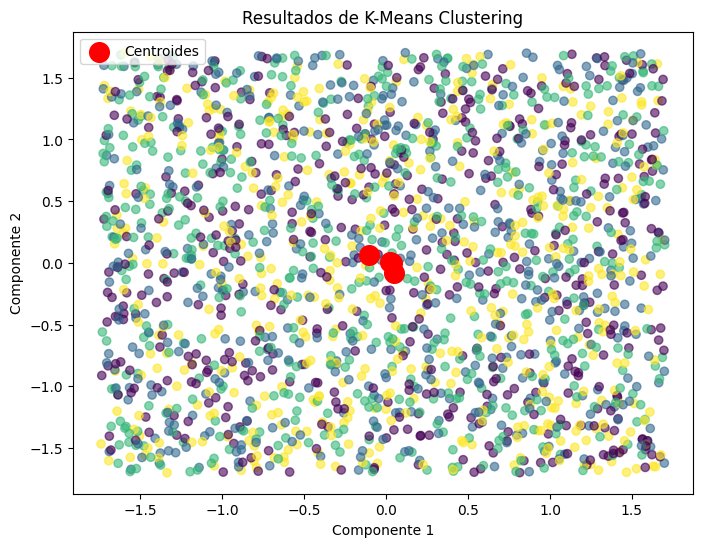

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides')
plt.title('Resultados de K-Means Clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()

In [21]:
silhouette_scores = []
for k in range(2, 11):  # El índice de Silhouette requiere al menos 2 clústeres
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(score)

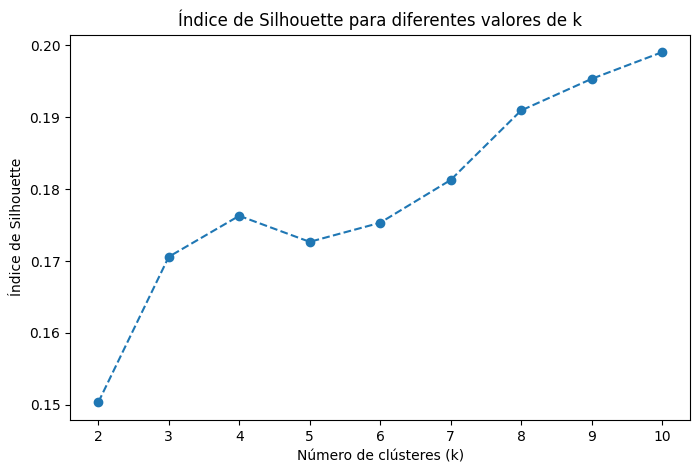

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Índice de Silhouette para diferentes valores de k')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Índice de Silhouette')
plt.show()

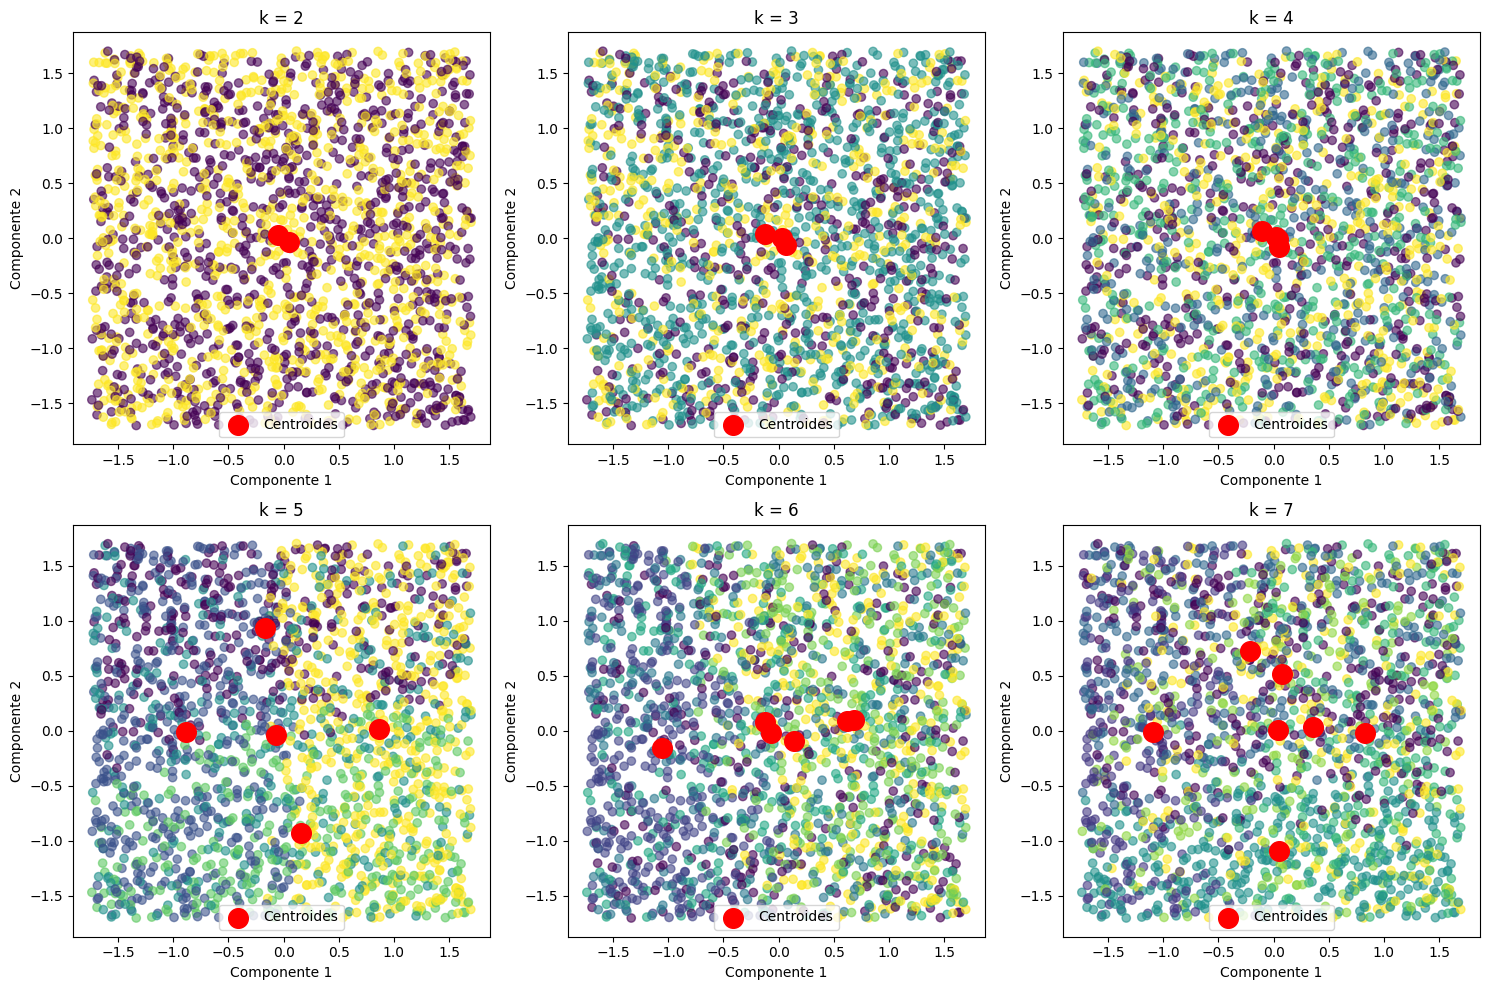

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas
axes = axes.flatten()
for i, k in enumerate(range(2, 8)):  # Probar con valores de k de 2 a 7
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)

    # Graficar clústeres
    ax = axes[i]
    ax.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides')
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.legend()

plt.tight_layout()
plt.show()